# Time Series (Furniture example)

In [38]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'


In [39]:
df=pd.read_excel("E:/Neha Python/Machin Learning Notes/Sample - Superstore.xls")
furniture=df.loc[df['Category']== 'Furniture']

In [40]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [41]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [42]:
cols=['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name',
      'Segment','Country','City','State','Postal Code','Region','Product ID','Category',
      'Sub-Category','Product Name','Quantity','Discount','Profit']

In [43]:
furniture.drop(cols,axis=1,inplace=True)  # Removind all other than sales and order date
furniture= furniture.sort_values('Order Date')

In [44]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [45]:
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [46]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [47]:
furniture=furniture.set_index('Order Date')  # It will set Order date as index
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [48]:
y= furniture['Sales'].resample('MS').mean()  # MS=it is column in given data (maxi. Sales)
# Resample is for monthwise mean . If we take only mean here then it will give mean of all months at single time. So we have to
# use resample function

In [49]:
y['2017':]  # we are taking mean of each month sales for yr 2017 to check seasonal products etc.

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [50]:
'''Visualizing furniture sales time series data''' 

'Visualizing furniture sales time series data'

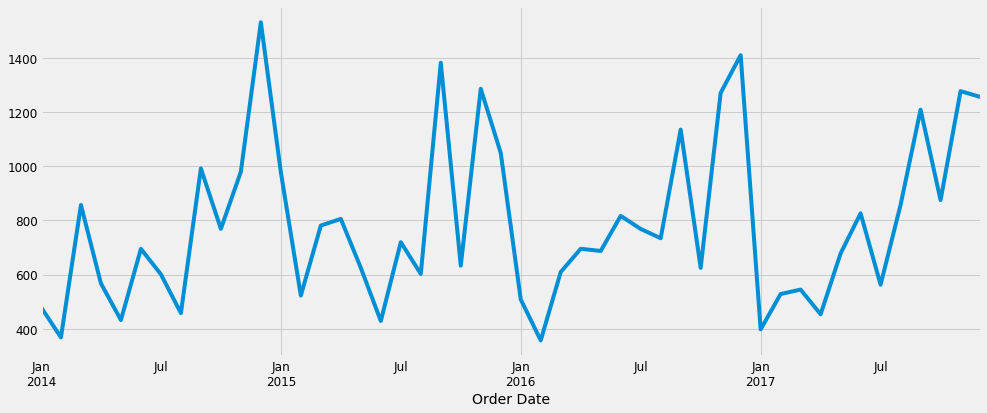

In [51]:
y.plot(figsize=(15,6))
plt.show()    

# According to graph sales will reache to peak at year end 

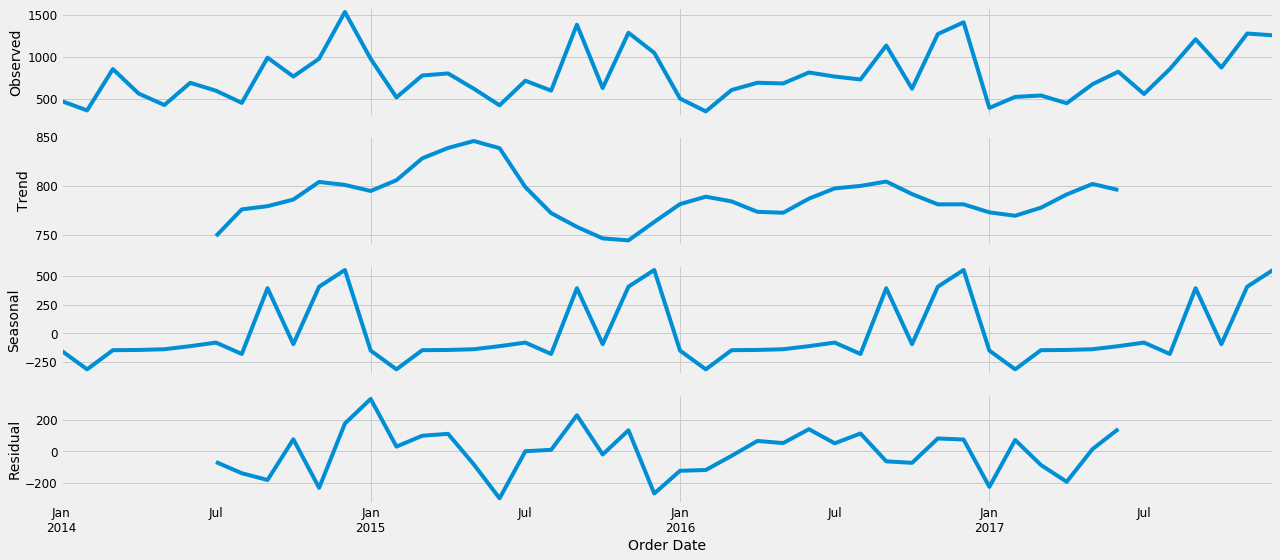

In [52]:
# Trend Seasonality and residual
from pylab import rcParams
rcParams['figure.figsize']=18,8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')  # Model to calculate trend, seasonal, residual. 
# additive is model type which will give next prediction based on adding previous data
fig=decomposition.plot()
plt.show()

In [53]:
'''Time series forecasting with ARIMA'''

'Time series forecasting with ARIMA'

In [54]:
# SAme code is used for any time series model

p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))  # Gives combination from 000 to 111
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list 
              (itertools.product(p,d,q))]
# HEre 12 is taken for yearly basis . If we want Quarter basis we have to take 4
print('Example of parameter combinations for seasonal ARIMA...')
print('SARIMAX : {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX : {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX : {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX : {} x {}'.format(pdq[2],seasonal_pdq[4]))

Example of parameter combinations for seasonal ARIMA...
SARIMAX : (0, 0, 1) x (0, 0, 1, 12)
SARIMAX : (0, 0, 1) x (0, 1, 0, 12)
SARIMAX : (0, 1, 0) x (0, 1, 1, 12)
SARIMAX : (0, 1, 0) x (1, 0, 0, 12)


In [55]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y, 
                                          order=param,
                                          seasonal_order=param_seasonal,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
            results=mod.fit()
            
            print('ARIMA {}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
                continue

ARIMA (0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA (0, 0, 0)x(0, 0, 1, 12)12 - AIC:1446.5593227130305
ARIMA (0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920218
ARIMA (0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365
ARIMA (0, 0, 0)x(1, 0, 1, 12)12 - AIC:1172.208674145885
ARIMA (0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA (0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758095
ARIMA (0, 0, 1)x(0, 0, 1, 12)12 - AIC:2900.357535652858
ARIMA (0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091255
ARIMA (0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.574045803366
ARIMA (0, 0, 1)x(1, 0, 1, 12)12 - AIC:2513.1394870316744
ARIMA (0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468657
ARIMA (0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA (0, 1, 0)x(0, 0, 1, 12)12 - AIC:1250.2320272227237
ARIMA (0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA (0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA (0, 1, 0)x(1, 0, 1, 12)12 - AIC:1550.2003231687213
ARIMA (0, 1, 0)x(1, 1, 0, 12)12 - AIC:319

In [56]:
# From result ARIMA (1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.7875439553055 it is lowest value of AIC 
# so we choose oreder and seasonal order for this result
mod=sm.tsa.statespace.SARIMAX(y,
                              order= (1,1,1),
                              seasonal_order=(1,1,0,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results=mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


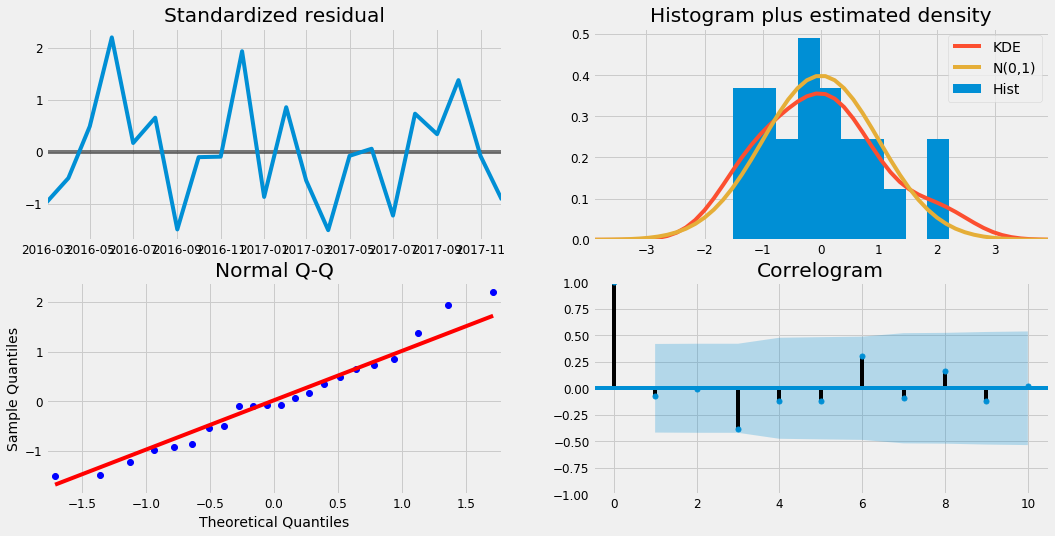

In [57]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

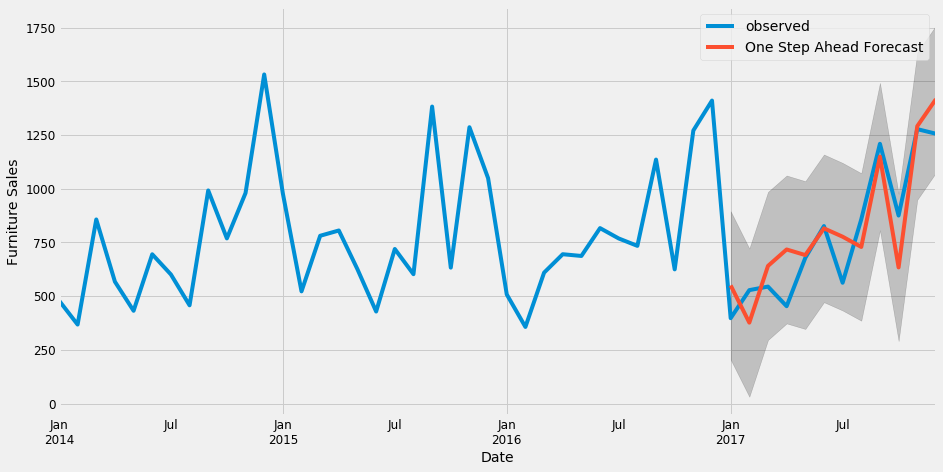

In [58]:
pred=results.get_prediction(start=pd.to_datetime('2017-01-01'),  # Can change starting date 
                        dynamic=False)
pred_ci=pred.conf_int()
ax=y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One Step Ahead Forecast',figsize=(14,7))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [59]:
y_forecasted=pred.predicted_mean
y_truth=y['2017-01-01':]

# Compare the mean square error
mse=((y_forecasted-y_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))

The Mean Squared Error of our forecasts is 22993.58


In [60]:
print('The Root Mean Squared Error of our forecast is {}'.format(round(np.sqrt(mse),2)))   # Calculatinf std. deviation

The Root Mean Squared Error of our forecast is 151.64


In [61]:
''' Producing and visualizing values for forecast'''

' Producing and visualizing values for forecast'

In [62]:
df.shape

(9994, 21)

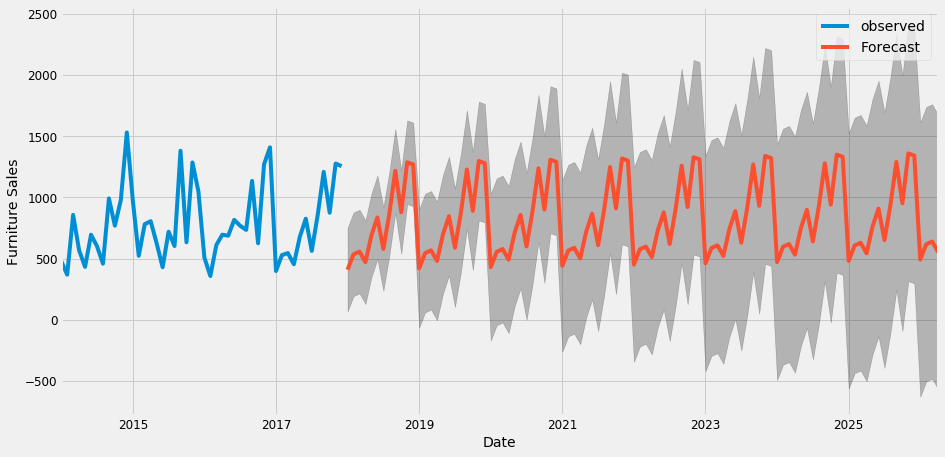

In [63]:
pred_uc=results.get_forecast(steps=100) # Steps=100 is number of months we can change it.
pred_ci=pred_uc.conf_int()

ax=y.plot(label='observed',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()


In [64]:
''' Time Series comparisoon furniture sales and office supplies'''

' Time Series comparisoon furniture sales and office supplies'

In [65]:
furniture=df.loc[df['Category']=='Furniture']
office=df.loc[df['Category']=='Office Supplies']

In [66]:
furniture.shape,office.shape

((2121, 21), (6026, 21))

In [67]:
cols=['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name',
      'Segment','Country','City','State','Postal Code','Region','Product ID','Category',
      'Sub-Category','Product Name','Quantity','Discount','Profit']

furniture.drop(cols, axis=1, inplace=True)
office.drop(cols,axis=1,inplace=True)

furniture=furniture.sort_values('Order Date')
office=office.sort_values('Order Date')

furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()
office=office.groupby('Order Date')['Sales'].sum().reset_index()

In [68]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [69]:
office.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [70]:
'''Data Exploration : comparing office sales and furniture sales'''

'Data Exploration : comparing office sales and furniture sales'

In [71]:
furniture=furniture.set_index('Order Date')
office=office.set_index('Order Date')

y_furniture=furniture['Sales'].resample('MS').mean()
y_office=office['Sales'].resample('MS').mean()

furniture=pd.DataFrame({'Order Date': y_furniture.index,
                         'Sales': y_furniture.values})
office=pd.DataFrame({'Order Date': y_office.index,
                         'Sales': y_office.values})

store=furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x':'furniture_sales',
                       'Sales_y': 'office_sales'}, inplace=True)

store.head(10)

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545
5,2014-06-01,695.059242,588.774409
6,2014-07-01,601.169500,756.060400
7,2014-08-01,457.521656,541.879143
8,2014-09-01,992.353367,1015.677704
9,2014-10-01,769.015437,267.078815


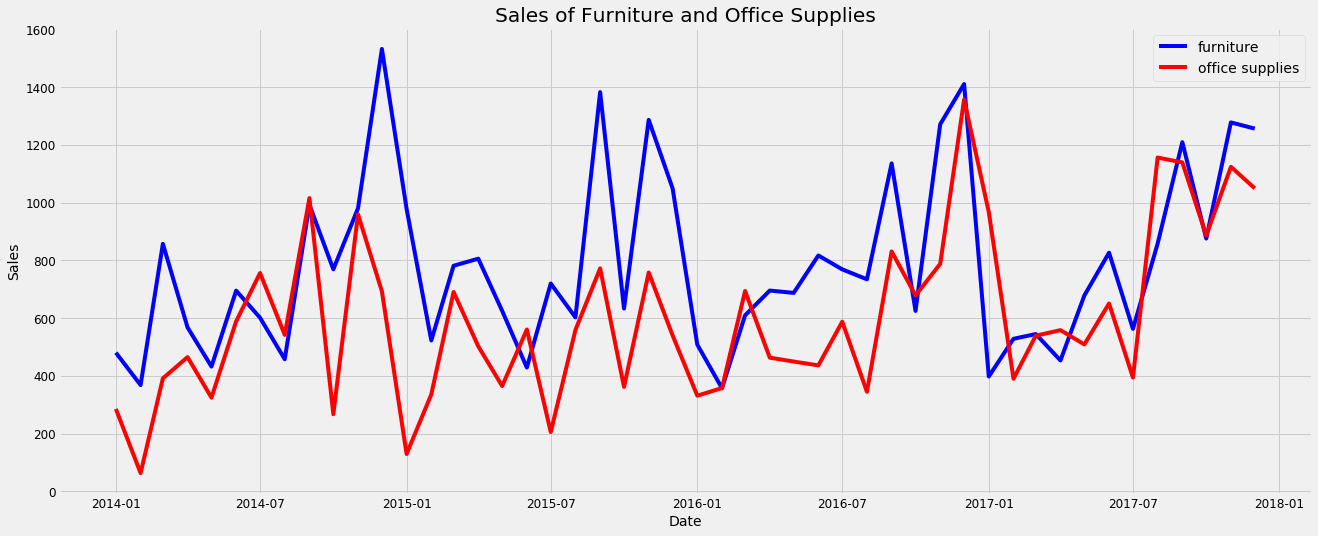

In [75]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'],store['furniture_sales'],
         'b-',label='furniture')
plt.plot(store['Order Date'],store['office_sales'],
         'r-',label='office supplies')
plt.xlabel('Date');
plt.ylabel('Sales');
plt.title('Sales of Furniture and Office Supplies')
plt.legend()


In [76]:
# Now we find when there wa best sale of office than furniture
first_date= store.ix[np.min(list(np.where(store['office_sales']
                                         >store['furniture_sales'])[0])),'Order Date']
print("Office suplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office suplies first time produced higher sales than furniture is 2014-07-01.


In [77]:
'''Time Series Modeling with Prophet'''

'Time Series Modeling with Prophet'

In [78]:
!pip install Prophet

  Stored in directory: C:\Users\Asus\AppData\Local\pip\Cache\wheels\77\3e\f3\1c536bf1f871f818686e7fbf31cab18d52787a72dea8640756
Successfully built Prophet


In [79]:
import Prophet
furniture=furniture.rename(columns={'Order Date':'ds','Sales':'y'})
furniture_model=Prophet(interval_width=0.95)
furniture_model.fit(furniture)

office=office.rename(columns={'Order Date':'ds','Sales':'y'})
office_model=Prophet(interval_width=0.95)
office_model.fit(office)

ModuleNotFoundError: No module named 'Prophet'